# Import

In [5]:
# data vizualiation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# opening files
import glob

# Room temperature Grazing Angle Reflectance (70 and 13 degrees)

## 70 degrees
- VO2/HOZ/Si n++ (ref: gold mirror)
- VO2/HOZ/c-saphire (ref: c-saphire)

## 13 degrees
- VO2/HOZ/Si n++ (ref: Si n++)

## Opening the data

In [63]:
filenames_70 = glob.glob("Results_AILES_July2022/Grazing_Angle_RT_13_70_degrees/70_degrees/*")
filenames_13 = glob.glob("Results_AILES_July2022/Grazing_Angle_RT_13_70_degrees/13_degrees/*")

filenames_70.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
filenames_13.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))


grazing_angle_70 = {}
grazing_angle_13 = {}


for i in filenames_70:
    sample = pd.read_csv(i, index_col=False, 
                names=["Frequency", "Signal"], header=None, sep = '\t')
    
    grazing_angle_70[i[54:-2]] = sample
    
for i in filenames_13:
    sample = pd.read_csv(i, index_col=False, 
                names=["Frequency", "Signal"], header=None, sep = '\t')
    
    grazing_angle_13[i[54:-2]] = sample    

## Plotting 70 degrees

Text(0, 0.5, 'Reflectance (a.u.)')

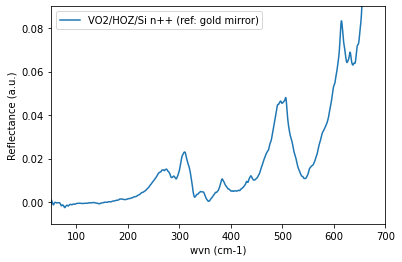

In [47]:
VO2_HZO_Si_70 = grazing_angle_70["70_degrees\\VO2-160nm-HZO-16nm-Sindoper-reflecto-70deg"]["Signal"]/ \
                                grazing_angle_70["70_degrees\\ref-gold_mirror-reflecto-70deg"]["Signal"]

VO2_HZO_saphire_70 = grazing_angle_70["70_degrees\\VO2_c-sapphire-SW14-reflecto-70deg"]["Signal"]/ \
                                grazing_angle_70["70_degrees\\ref-c-sapphire--reflecto-70deg"]["Signal"]



wvn_si = grazing_angle_70["70_degrees\\VO2-160nm-HZO-16nm-Sindoper-reflecto-70deg"]["Frequency"]

wvn_saphire = grazing_angle_70["70_degrees\\VO2_c-sapphire-SW14-reflecto-70deg"]["Frequency"]

plt.plot(wvn_si, VO2_HZO_Si_70, label="VO2/HOZ/Si n++ (ref: gold mirror)")
plt.xlim(50, 700)
plt.ylim(-0.01, .09)
plt.legend()
plt.xlabel("wvn (cm-1)")
plt.ylabel("Reflectance (a.u.)")

Text(0, 0.5, 'Reflectance (a.u.)')

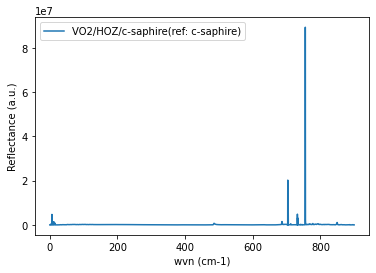

In [58]:
plt.plot(wvn_saphire, VO2_HZO_saphire_70, label="VO2/HOZ/c-saphire(ref: c-saphire)")
plt.legend()
plt.xlabel("wvn (cm-1)")
plt.ylabel("Reflectance (a.u.)")

# very weird, do not consider

In [59]:
import plotly.express as px # interactive graphs

In [56]:
px.line(x=wvn_saphire, y=VO2_HZO_saphire_70) # very weird, do not consider


## Plotting 13 degrees

Text(0, 0.5, 'Reflectance (a.u.)')

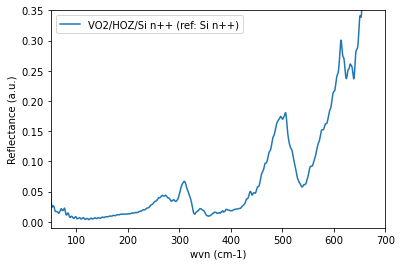

In [71]:
VO2_HZO_Si_13 = grazing_angle_13["13_degrees\\VO2-160nm-HZO-16nm-Sindoper-reflecto-13deg"]["Signal"]/ \
                                grazing_angle_13["13_degrees\\ref-Sindoper-reflecto-13deg"]["Signal"]

wvn_si_13 = grazing_angle_13["13_degrees\\VO2-160nm-HZO-16nm-Sindoper-reflecto-13deg"]["Frequency"]


plt.plot(wvn_si_13, VO2_HZO_Si_13, label="VO2/HOZ/Si n++ (ref: Si n++)")
plt.xlim(50, 700)
plt.ylim(-0.01, .35)
plt.legend()
plt.xlabel("wvn (cm-1)")
plt.ylabel("Reflectance (a.u.)")

# Absorption measurements - SW14 - Saphire Substrate
- Angle always 11 degrees inside cryostat

## Room temperature
- absorbance spectrum is not great, we only see one part of the frequency range because of saphire absorption

In [95]:
SW14_raw = pd.read_csv("Results_AILES_July2022/Cryostat_Heating_Reflectance_SW14_saphire_substrate/VO2_Al2O3-oven-RT.0",
                   index_col=False, 
                   names=["Frequency", "Signal"], 
                   header=None, 
                   sep = '\t')


ref_Al2O3 = pd.read_csv("Results_AILES_July2022/Cryostat_Heating_Reflectance_SW14_saphire_substrate/Al2O3-oven-RT.0",
                   index_col=False, 
                   names=["Frequency", "Signal"], 
                   header=None, 
                   sep = '\t')


ref_11_20_Al2O3 = pd.read_csv("Results_AILES_July2022/Cryostat_Heating_Reflectance_SW14_saphire_substrate/ref_11-20_Al2O3-ovenRT.0",
                   index_col=False, 
                   names=["Frequency", "Signal"], 
                   header=None, 
                   sep = '\t')

Text(0, 0.5, 'Absorbance (a.u.)')

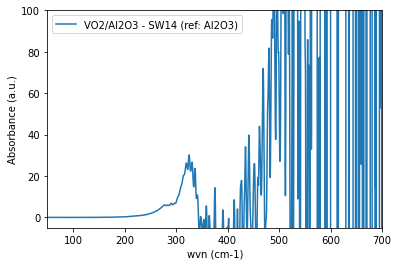

In [99]:
SW14_ref_Al2O3 = SW14_raw["Signal"]/ref_Al2O3["Signal"]

plt.plot(SW14_raw["Frequency"], SW14_ref_Al2O3, label="VO2/Al2O3 - SW14 (ref: Al2O3)")
plt.xlim(50, 700)
plt.ylim(-5, 100)
plt.legend()
plt.xlabel("wvn (cm-1)")
plt.ylabel("Absorbance (a.u.)")

Text(0, 0.5, 'Absorbance (a.u.)')

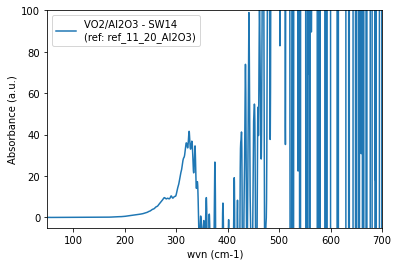

In [102]:
SW14_ref_11_20_Al2O3 = SW14_raw["Signal"]/ref_11_20_Al2O3["Signal"]

plt.plot(SW14_raw["Frequency"], SW14_ref_11_20_Al2O3, label="VO2/Al2O3 - SW14 \n(ref: ref_11_20_Al2O3)")
plt.xlim(50, 700)
plt.ylim(-5, 100)
plt.legend()
plt.xlabel("wvn (cm-1)")
plt.ylabel("Absorbance (a.u.)")

## Temperature measurements

In [223]:
filenames_ref = glob.glob("Results_AILES_July2022/Cryostat_Heating_Reflectance_SW14_saphire_substrate/Al2O3-Sw*")

filenames_sample = glob.glob("Results_AILES_July2022/Cryostat_Heating_Reflectance_SW14_saphire_substrate/VO2_Al2O3-Sw*.0")

In [224]:
print(len(filenames_sample), len(filenames_ref))

18 18


In [225]:
SW14_T = {}
wvn = {}

for file_sample, file_ref in zip(filenames_sample, filenames_ref):
#     print(file_sample, "\n", file_ref)
    ref = pd.read_csv(file_ref,
                   index_col=False, 
                   names=["Frequency", "Signal"], 
                   header=None, 
                   sep = '\t')
    
    sample = pd.read_csv(file_sample,
                   index_col=False, 
                   names=["Frequency", "Signal"], 
                   header=None, 
                   sep = '\t')
    
    absorbance = sample["Signal"]/ref["Signal"]
    
    SW14_T[file_sample[74:-2]] = absorbance
    wvn[file_sample[74:-2]] = ref["Frequency"]
    

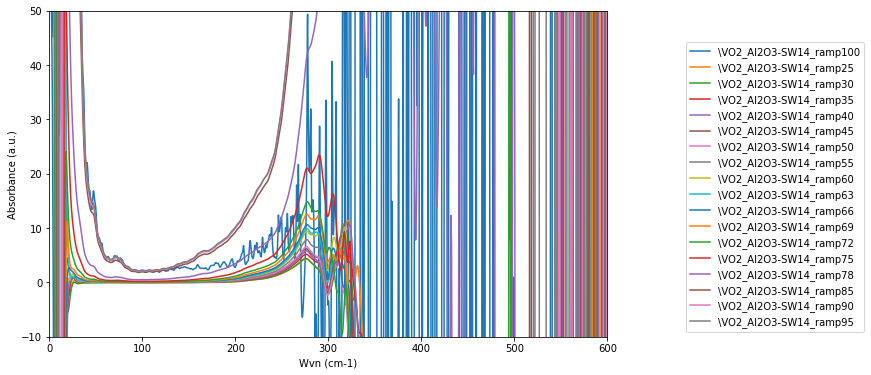

In [227]:
fig, ax = plt.subplots(figsize=(10,6))

for freq, sample in zip(wvn, SW14_T):
    ax.plot(wvn[freq], SW14_T[sample], label=sample)

ax.set(xlim=(0, 600), ylim=(-10, 50), ylabel="Absorbance (a.u.)", xlabel="Wvn (cm-1)")
ax.legend(loc='best', bbox_to_anchor=(0.8, 0., 1, 0.9)) 

# we need to remove the blue one that is very noise, and the rest is ok

# Reflectance Measurements - VO2 - Pierre - Cryostat - Heating
- SW17 and SW16 - both FIR and MIR

## SW17

In [204]:
filenames_SW17 = glob.glob("Results_AILES_July2022/VO2_Four/SW17*")

filemanmes_ref_SW17 = glob.glob("Results_AILES_July2022/VO2_Four/Ref_HZO_14p7nm_n++Si_Cryo_Temp.*")

filenames_SW17.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
filemanmes_ref_SW17.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

In [205]:
len(filenames_SW17), len(filemanmes_ref_SW17)

(17, 17)

In [230]:
SW17_T = {}
wvn_SW17_T = {}

for file_sample, file_ref in zip(filenames_SW17, filemanmes_ref_SW17):
#     print(file_sample, "\n", file_ref)
    ref = pd.read_csv(file_ref,
                   index_col=False, 
                   names=["Frequency", "Signal"], 
                   header=None, 
                   sep = '\t')
    
    sample = pd.read_csv(file_sample,
                   index_col=False, 
                   names=["Frequency", "Signal"], 
                   header=None, 
                   sep = '\t')
    
    absorbance = sample["Signal"]/ref["Signal"]
    
    SW17_T[file_sample[31:]] = absorbance
    wvn_SW17_T[file_sample[31:]] = ref["Frequency"]

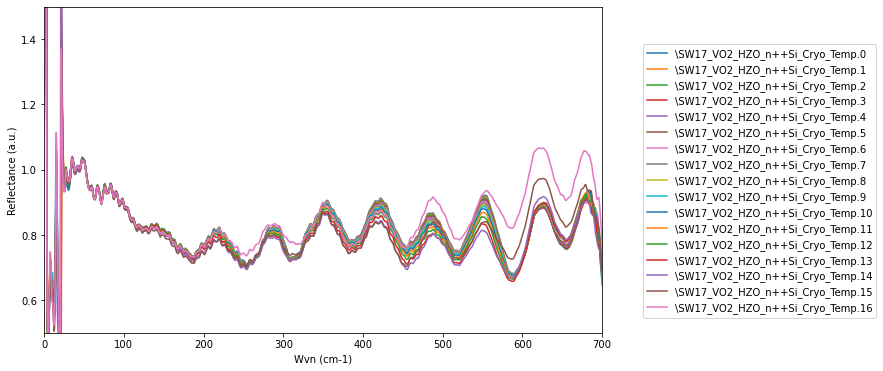

In [231]:
fig, ax = plt.subplots(figsize=(10,6))

for freq, sample in zip(wvn_SW17_T, SW17_T):
    ax.plot(wvn_SW17_T[freq], SW17_T[sample], label=sample)

ax.set(xlim=(0, 700), ylim=(0.5, 1.5), ylabel="Reflectance (a.u.)", xlabel="Wvn (cm-1)")
ax.legend(loc='best', bbox_to_anchor=(0.5, 0., 1, 0.9)) 

## SW16

In [236]:
filenames_SW16 = glob.glob("Results_AILES_July2022/VO2_Four/SW16_VO2_165_HZO_16nm_n+Si_Cryo_Temp2*")

filemanmes_ref_SW16 = glob.glob("Results_AILES_July2022/VO2_Four/Ref_HZO_14p7nm_n++Si_Cryo_Temp2.*")

filenames_SW16.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
filemanmes_ref_SW16.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

In [237]:
len(filenames_SW16), len(filemanmes_ref_SW16)

(21, 21)

In [238]:
SW16_T = {}
wvn_SW16_T = {}

for file_sample, file_ref in zip(filenames_SW16, filemanmes_ref_SW16):
#     print(file_sample, "\n", file_ref)
    ref = pd.read_csv(file_ref,
                   index_col=False, 
                   names=["Frequency", "Signal"], 
                   header=None, 
                   sep = '\t')
    
    sample = pd.read_csv(file_sample,
                   index_col=False, 
                   names=["Frequency", "Signal"], 
                   header=None, 
                   sep = '\t')
    
    absorbance = sample["Signal"]/ref["Signal"]
    
    SW16_T[file_sample[31:]] = absorbance
    wvn_SW16_T[file_sample[31:]] = ref["Frequency"]

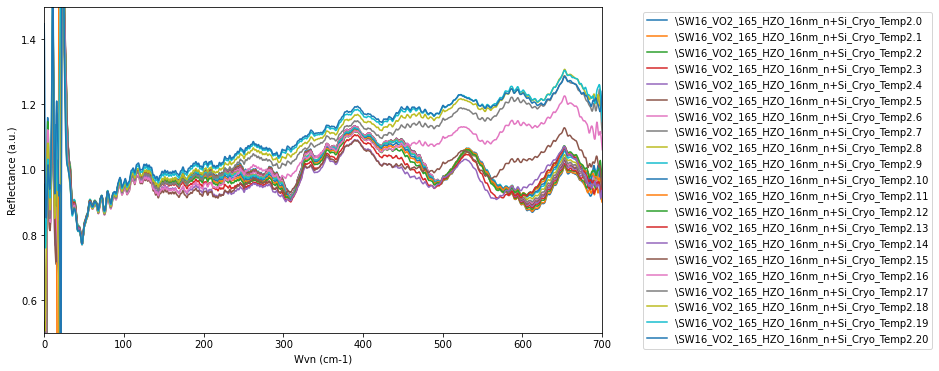

In [241]:
fig, ax = plt.subplots(figsize=(10,6))

for freq, sample in zip(wvn_SW16_T, SW16_T):
    ax.plot(wvn_SW16_T[freq], SW16_T[sample], label=sample)

ax.set(xlim=(0, 700), ylim=(0.5, 1.5), ylabel="Reflectance (a.u.)", xlabel="Wvn (cm-1)")
ax.legend(loc='best', bbox_to_anchor=(0.6, 0., 1, 1)) 